In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('darknet.csv.')
df 

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,10.8.8.130-64.4.23.162-52161-40019-6,10.8.8.130,52161,64.4.23.162,40019,6,5/6/2015 11:50,119786918,4,...,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,VPN,File-Transfer
22572,139215,10.8.8.130-69.181.136.22-53288-57191-6,10.8.8.130,53288,69.181.136.22,57191,6,5/6/2015 11:50,119546234,21,...,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,VPN,File-Transfer
22573,139216,10.8.8.130-69.181.136.22-49539-57191-17,10.8.8.130,49539,69.181.136.22,57191,17,5/6/2015 11:50,119749355,24,...,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,VPN,File-Transfer
22574,139217,10.8.8.130-81.137.205.196-49539-23528-17,10.8.8.130,49539,81.137.205.196,23528,17,5/6/2015 11:50,119992029,8,...,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,VPN,File-Transfer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

In [4]:
#df = df.select_dtypes(include=[np.number])  # Garde seulement les colonnes numériques

In [5]:
df.describe()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,22576.000000,22576.000000,22576.000000,22576.000000,2.257600e+04,22576.000000,22576.000000,2.257600e+04,2.257600e+04,22576.000000,...,22576.000000,22576.000000,22576.0,22576.0,22576.0,22576.0,2.257600e+04,2.257600e+04,2.257600e+04,2.257600e+04
mean,92144.029855,39851.059178,8834.622209,12.211818,1.815340e+07,355.700788,349.194853,3.222709e+05,3.182180e+05,206.102011,...,197.278836,13.946846,0.0,0.0,0.0,0.0,5.072152e+14,4.484880e+13,5.310100e+14,4.340318e+14
std,39041.466230,20061.874717,16602.602949,5.545060,3.614921e+07,5025.950383,8028.372112,7.328479e+06,1.079834e+07,942.960597,...,2843.763867,7.832488,0.0,0.0,0.0,0.0,6.697049e+14,1.792783e+14,6.929304e+14,6.591732e+14
min,32871.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,39053.750000,27249.000000,53.000000,6.000000,1.289718e+05,1.000000,0.000000,2.900000e+01,0.000000e+00,21.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107731.500000,46941.000000,1325.000000,17.000000,4.120765e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,122496.250000,55721.500000,5355.000000,17.000000,6.586137e+06,5.000000,3.000000,2.060000e+02,2.250000e+02,66.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,1.432320e+15,6.246222e+05,1.433350e+15,1.432320e+15
max,139218.000000,65534.000000,65514.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.456420e+15,1.016830e+15,1.456420e+15,1.456420e+15


In [6]:
df. isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Label.1       0
Length: 86, dtype: int64

In [7]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [8]:
encoder = LabelEncoder()
list = ['Flow ID','Src IP','Dst IP','Timestamp','Label','Label.1']
for i in list:
    df[i] = encoder.fit_transform(df[i])

In [9]:
import seaborn as sns

<Axes: >

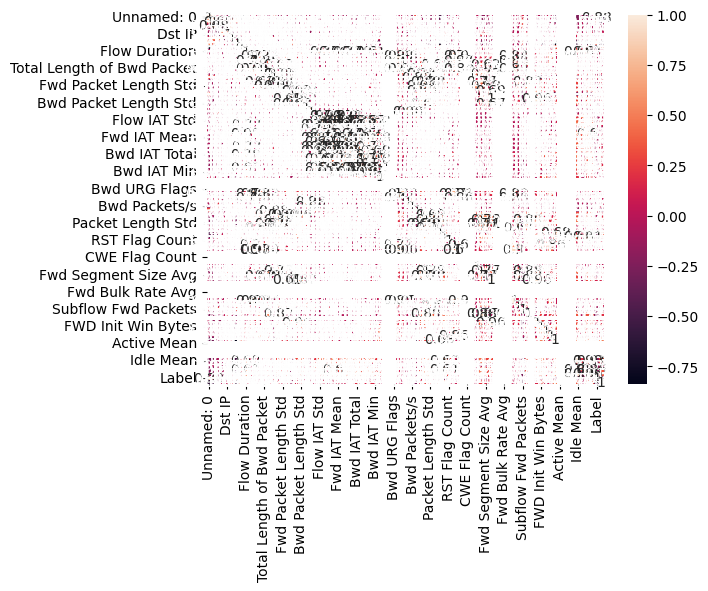

In [10]:
sns.heatmap(df.corr(), annot = True)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [12]:
import numpy as np

# Vérifier si X contient des valeurs infinies
print(np.any(np.isinf(X)))  # Cela renvoie True si des 'inf' existent dans X

# Vérifier si X contient des valeurs trop grandes (au-delà de 1e10 ou 1e20 par exemple)
print(np.max(X))  # Valeur maximale dans X
print(np.min(X))  # Valeur minimale dans X


True
inf
-213.0


In [13]:
# Remplacer les valeurs infinies (inf) par NaN
X = np.where(np.isinf(X), np.nan, X)


In [14]:
from sklearn.impute import SimpleImputer

# Remplacer les NaN par la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [15]:
# Limiter les valeurs trop grandes à un seuil
X = np.clip(X, -1e10, 1e10)  # Remplace -1e10 et 1e10 par le seuil que tu choisis


In [16]:
# Vérifier si X contient des NaN
print(np.any(np.isnan(X)))  # Cela renvoie True si des NaN existent dans X

False


In [17]:
import seaborn as sns

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Diviser en train (80%) et test (20%)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [42]:
# Définir les modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8948
Decision Tree Accuracy: 0.9980
Random Forest Accuracy: 0.9971
SVM Accuracy: 0.9588
KNN Accuracy: 0.9659


In [20]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (18060, 85)
X_test: (4516, 85)
y_train: (18060,)
y_test: (4516,)


In [21]:
model_dnn = Sequential()

In [25]:
model_dnn = Sequential()
model_dnn.add(Dense(128, input_shape=(85,), activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dropout(0,4))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(1, activation='sigmoid'))
model_dnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model_dnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,057 (301.00 KB)

 Trainable params: 77,057 (301.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow as tf

In [27]:
history = model_dnn.fit(X_train, y_train, epochs=60, verbose=1, validation_data=(X_test, y_test))

Epoch 1/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8783 - loss: 0.3100 - val_accuracy: 0.9566 - val_loss: 0.1316
Epoch 2/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9529 - loss: 0.1383 - val_accuracy: 0.9776 - val_loss: 0.0831
Epoch 3/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9674 - loss: 0.1042 - val_accuracy: 0.9767 - val_loss: 0.0813
Epoch 4/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.0883 - val_accuracy: 0.9785 - val_loss: 0.0691
Epoch 5/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0760 - val_accuracy: 0.9816 - val_loss: 0.0646
Epoch 6/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.0724 - val_accuracy: 0.9805 - val_loss: 0.0638
Epoch 7/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9802 - loss: 0.0648 - val_accuracy: 0.9801 - val_loss: 0.0656
Epoch 8/60
565/565 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9803 - loss: 0.0674 - val_accuracy: 0.

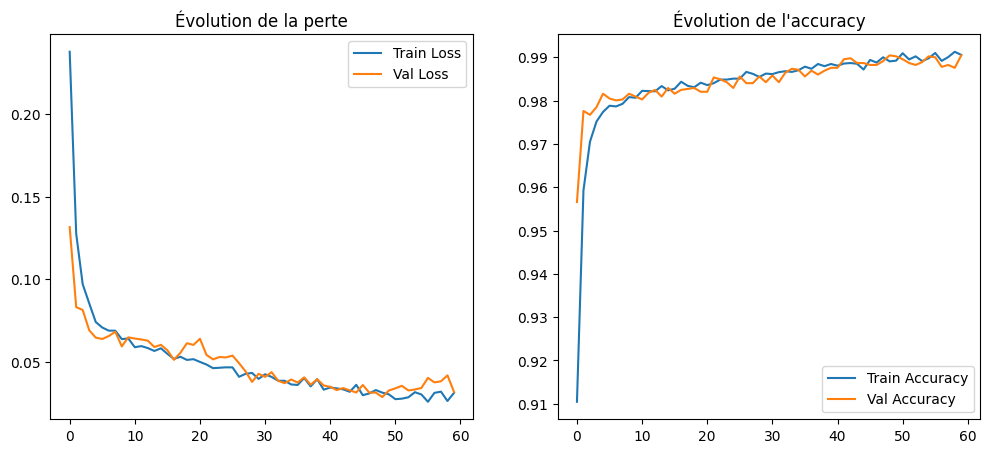

In [28]:
plt.figure(figsize=(12,5))

# Courbe de la perte
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Évolution de la perte')

# Courbe de l'accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Évolution de l'accuracy")

plt.show()


In [44]:
from sklearn.metrics import classification_report


In [45]:
# Évaluation du SNN
y_pred_snn = (model.predict(X_test) > 0.5).astype(int)
print("Shallow Neural Network Classification Report:")
print(classification_report(y_test, y_pred_snn))

# Évaluation des modèles classiques
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Shallow Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2359
           1       0.96      0.97      0.96      2157

    accuracy                           0.97      4516
   macro avg       0.97      0.97      0.97      4516
weighted avg       0.97      0.97      0.97      4516

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2359
           1       0.91      0.86      0.89      2157

    accuracy                           0.89      4516
   macro avg       0.90      0.89      0.89      4516
weighted avg       0.90      0.89      0.89      4516

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2359
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      4516
  